In [1]:
#coding=utf-8
import cv2
import torch
import numpy as np
from torch import nn
from PIL import Image
import torchvision as tv 
from matplotlib import pyplot as plt

from models import gain

In [2]:
class GAINAPI(object):
    def __init__(self, model_path=None, num_classes=110):
        mean_arr = [0.5, 0.5, 0.5]
        stddev_arr = [0.5, 0.5, 0.5]
        normalize = tv.transforms.Normalize(mean=mean_arr,
                                         std=stddev_arr)

        model_dimension = 224
        center_crop = 224
        self.data_transform = tv.transforms.Compose([
            tv.transforms.Resize(model_dimension),
            tv.transforms.CenterCrop(center_crop),
            tv.transforms.ToTensor(),
            normalize,
        ])
        self.model = gain.GAIN(num_classes).cuda()
            
        if model_path is not None:
            self.model.load_state_dict(torch.load(model_path))
        self.model.eval()
        self.softmask = gain.SoftMask()
        
    def __call__(self, img):
        with torch.no_grad():
            x = self.data_transform(img).unsqueeze(0).cuda()
            n, c, h, w = x.shape
            out, out_masked, cam = self.model(x)
            x = self.softmask(cam)
            x = x.cpu().squeeze().numpy()
        return x

In [3]:
gain_api = GAINAPI('saved_models/best_GAIN with_transform: False.pt')
img = Image.open('data/IJCAI_2019_AAAC_train/00102/22f0bf92450a2ce40e4db8620cf15c17.jpg')
img_np = np.array(img)
cam = gain_api(img)

/home/common/miniconda3/envs/python3.7_pytorch/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


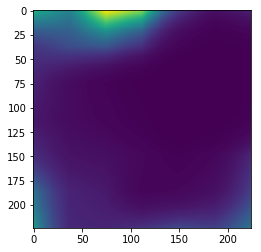

In [4]:
plt.imshow(cam)